In [88]:
from pylab import*
%run "senofac.ipynb"
%matplotlib inline

Capturando las funciones a evaluar para realizar el cálculo numérico a partir del sistema de tres ecuaciones acopladas que deja la ecuación diferencial de tercer orden a resolver:

In [82]:
def dfuncion1(x,z,y,t):
    return z

In [83]:
def ddfuncion1(x,z,y,t):
    return x

In [84]:
def dd_funcion1(x,z,y,t):
    return -(x)**2 + 3*(z)**(3) - (cos(y))**2 + exp(-t)*miseno(3*t,10)

In [90]:
def dddfuncion1(x,y,z,t):
    return -2*x*dd_funcion1(x,z,y,t) + 9*(z**2)*x + 2*cos(y)*miseno(y,10)*z + exp(-t)*cos(3*t)*3 - exp(-t)*miseno(3*t,10)

Se comenzará con un paso grande de $h$ para irlo disminuyendo según sea necesario para determinar por inspección cuando el paso sea lo suficientemente bueno como para confirmar la convergencia de la solución.

In [33]:
def euler(funcion,dfuncion,dd_funcion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    x = [0]*len(tiempos)
    x[0] = p_ini[3]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + funcion(x[i],z[i],y[i],tiempos[i])*h #para solucion x, donde dfuncion es la derivada de x
        z[i+1] = z[i] + dfuncion(x[i],z[i],y[i],tiempos[i])*h #para la derivada v, y 'funcion' es la derivada de v
        x[i+1] = x[i] + dd_funcion(x[i],z[i],y[i],tiempos[i])*h
    solucion = [tiempos,y] 
    return solucion

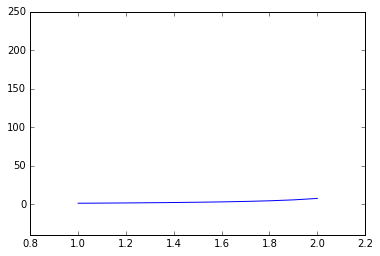

In [122]:
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.1)
plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


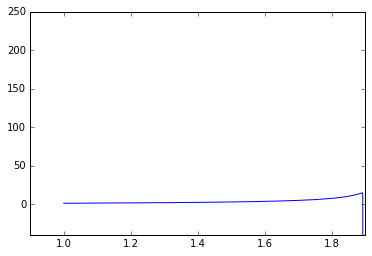

In [121]:
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.001)
plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


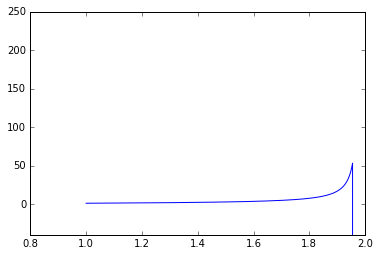

In [100]:
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.00001)
plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


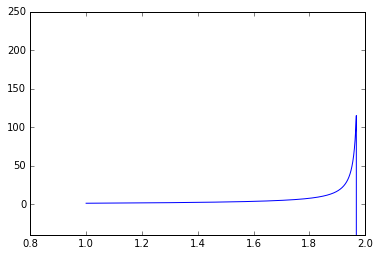

In [123]:
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.000001)
plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


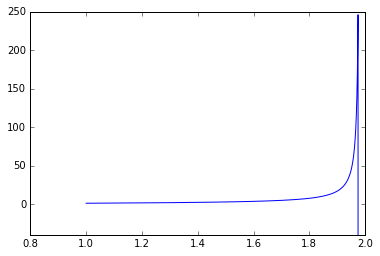

In [124]:
sol = euler(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.0000001)
plt.ylim([-40,250])
plot(sol[0],sol[1])

Para el paso h = 0.0000001 se observa ya una forma considerable de la solución para valores muy cercanos a 2 (cerca de donde parece existir un punto singular). Al parecer, el acercamiento a un punto singular puede ser bastante dificil de hacer debido a que no se conoce ese punto singular y el paso puede resultar en que sea tan grande que no logre registrar comportamientos importantes de la función alrededor de este punto y simplemente no son consideradas sus cercanías por que quedaron muy distantes tanto el paso anterior como el posterior. Es por ello que conviene este paso tan pequeño. Siguiendo con los valores pequeños de h para Taylor.

In [98]:
def taylor2(dfuncion,ddfuncion,dd_funcion,dddfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    x = [0]*len(tiempos)
    x[0] = p_ini[3]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + dfuncion(x[i],z[i], y[i], tiempos[i])*h + 0.5*ddfuncion(x[i],z[i], y[i], tiempos[i])*(h**2) #para solucion x, donde dfuncion es la derivada de x
        z[i+1] = z[i] + ddfuncion(x[i],z[i], y[i], tiempos[i])*h + 0.5*dd_funcion(x[i],z[i], y[i], tiempos[i])*(h**2)#para la derivada v, y 'funcion' es la derivada de v
        x[i+1] = x[i] + dd_funcion(x[i],z[i], y[i], tiempos[i])*h + 0.5*dddfuncion(x[i],z[i], y[i], tiempos[i])*(h**2)
    solucion = [tiempos,y]
    return solucion

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


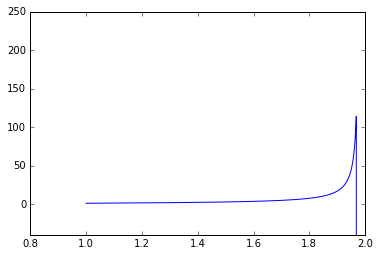

In [117]:
sol = taylor2(dfuncion1,ddfuncion1,dd_funcion1,dddfuncion1,[1,1,2,1],2,0.0001)
#plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


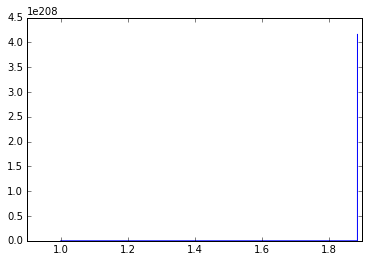

In [99]:
sol = taylor2(dfuncion1,ddfuncion1,dd_funcion1,dddfuncion1,[1,1,2,1],2,0.00001)
#plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


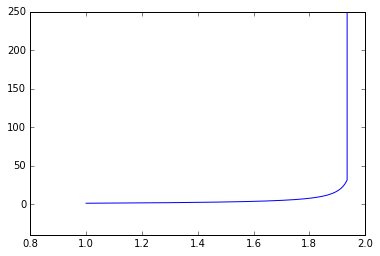

In [118]:
sol = taylor2(dfuncion1,ddfuncion1,dd_funcion1,dddfuncion1,[1,1,2,1],2,0.00001)
plt.ylim([-40,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


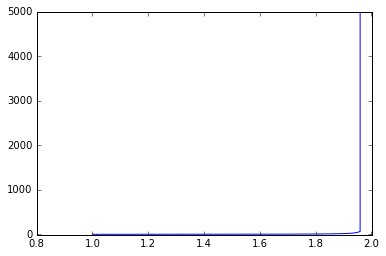

In [119]:
sol = taylor2(dfuncion1,ddfuncion1,dd_funcion1,dddfuncion1,[1,1,2,1],2,0.000001) #5ceros
plt.ylim([-10,5000])
plot(sol[0],sol[1])

Seguiremos intentando para $h$ parecidas y menores pero ahora con los métodos Runge-Kutta. Hasta el momento, parece ser que una $h = 0.000001$ es un excelente paso según el método de Taylor. La ausencia de la línea vertical es casi indicador de que la solución está próxima a converger con $h$ más pequeña.

In [126]:
def rk2(dfuncion,ddfuncion,dd_funcion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    x = [0]*len(tiempos)
    x[0] = p_ini[3]
    for i in range(len(tiempos)-1):
        y[i+1] = y[i] + (h/2)*(dfuncion(x[i],z[i], y[i],tiempos[i]) + dfuncion(x[i],z[i],y[i] + h*dfuncion(x[i],z[i],y[i],tiempos[i]), tiempos[i+1])) #para solucion x, donde dfuncion es la derivada de x        
        z[i+1] = z[i] + (h/2)*(ddfuncion(x[i],z[i],y[i],tiempos[i]) + ddfuncion(x[i],z[i], y[i] + h*ddfuncion(x[i],z[i],y[i],tiempos[i]), tiempos[i+1]))
        x[i+1] = x[i] + (h/2)*(dd_funcion(x[i],z[i],y[i],tiempos[i]) + dd_funcion(x[i],z[i], y[i] + h*dd_funcion(x[i],z[i],y[i],tiempos[i]), tiempos[i+1]))
        solucion = [tiempos,y]
    return solucion

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


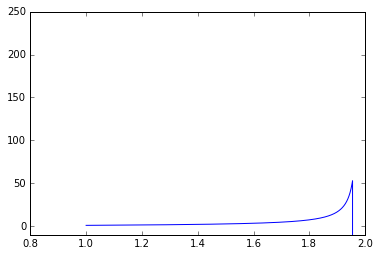

In [129]:
sol = rk2(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.00001) #4ceros
plt.ylim([-10,250])
plot(sol[0],sol[1])

In [130]:
sol = rk2(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2,0.0000001) #6ceros
plt.ylim([-10,5000])
plot(sol[0],sol[1])

KeyboardInterrupt: 

Hasta el momento se puede estimar que un buen paso para $h$ es aquél menor que $h=0.000001$. Por ahora, el tiempo se ha agotado y no han logrado obtenerse aún las soluciones para $h = 0.0000001$ pero es seguro que otorgará una visión más nítida de lo que sucede en el punto singular que se tiene cerca de 1.97 según se observa en las gráficas.

Para el intervalo 1 a 2.1 se usará el método de Runge Kutta de 4to Orden. Se iniciará con una h = 0.0001.

In [138]:
def rk4(funcion,devfuncion,devdevfuncion,p_ini,t_final,h):
    tiempos = arange(p_ini[0],t_final+h,h)
    y = [0]*len(tiempos)
    y[0] = p_ini[1]
    z = [0]*len(tiempos)
    z[0] = p_ini[2]
    x = [0]*len(tiempos)
    x[0] = p_ini[3]
    for i in range(len(tiempos)-1):
        k1 = h*funcion(x[i],z[i],y[i],tiempos[i])
        k2 = h*funcion(x[i],z[i],y[i] + k1/2, tiempos[i] + h/2)
        k3 = h*funcion(x[i],z[i],y[i] + k2/2, tiempos[i] + h/2)
        k4 = h*funcion(x[i],z[i],y[i] + k3, tiempos[i] + h)
        y[i+1] = y[i] + (1/6)*(k1 + 2*k2 + 2*k3 + k4) #para solucion x, donde dfuncion es la derivada de x        
        q1 = h*devfuncion(x[i],z[i],y[i],tiempos[i])
        q2 = h*devfuncion(x[i],z[i],y[i] + q1/2, tiempos[i] + h/2)
        q3 = h*devfuncion(x[i],z[i],y[i] + q2/2, tiempos[i] + h/2)
        q4 = h*devfuncion(x[i],z[i],y[i] + q3, tiempos[i] + h)
        z[i+1] = z[i] + (1/6)*(q1 + 2*q2 + 2*q3 + q4)
        x1 = h*devdevfuncion(x[i],z[i],y[i],tiempos[i])
        x2 = h*devdevfuncion(x[i],z[i],y[i] + x1/2, tiempos[i] + h/2)
        x3 = h*devdevfuncion(x[i],z[i],y[i] + x2/2, tiempos[i] + h/2)
        x4 = h*devdevfuncion(x[i],z[i],y[i] + x3, tiempos[i] + h)
        x[i+1] = x[i] + (1/6)*(x1 + 2*x2 + 2*x3 + x4)
    solucion = [tiempos,y]
    return solucion

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


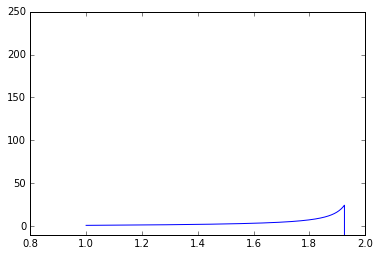

In [139]:
sol = rk4(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2.1,0.0001) #3ceros
plt.ylim([-10,250])
plot(sol[0],sol[1])

C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\AletsKaluchas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


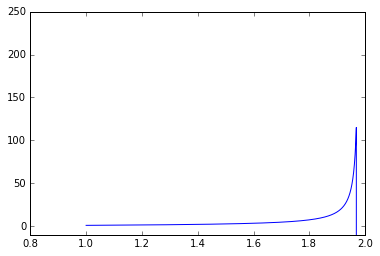

In [140]:
sol = rk4(dfuncion1,ddfuncion1,dd_funcion1,[1,1,2,1],2.1,0.000001) #5ceros
plt.ylim([-10,250])
plot(sol[0],sol[1])

El método rk4 para el segmento $1$ - $2.1$ como dominio muestra una solución semejante a la arrojada por los otros métodos para el segmento $1$ - $2$. De manera que la solución en estos intervalos resulta ser la misma ante estos métodos.

En conclusión final, el paso mínimo para una buena convergencia de la solución deberá ser próximo (y de preferencia menor) a $h = 0.000001$. Todos los integradores lo dicen. 

Lamentablemente ya no hubo tiempo para seguir obteniendo estas soluciones correspondientes a $h$s más pequeñas.